<a href="https://colab.research.google.com/github/BrainConnection/Dynamical_Decoupling_Project/blob/main/Without%20Purcell%20Filter%20(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [2]:
!pip install qutip
!pip install numpy
!pip install matplotlib
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 12.9 MB/s eta 0:00:00


In [3]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit, minimize

In [4]:
photon_list = np.array([0.0027809028825555213,
 0.0026145547910848515,
 0.0025759084899649558,
 0.0025300857393330913,
 0.0024721860424756076,
 0.002404658267884932,
 0.00232972434542873,
 0.002249191702467065,
 0.00216471175819369,
 0.0020777731073821333,
 0.0019896909924748828,
 0.001901601683921792,
 0.0018144559523372242,
 0.001729025223704284,
 0.0016459137710553046,
 0.0015655757637011499,
 0.0014883345171498746,
 0.0014144023272667757,
 0.0013438996421100558,
 0.0012768726076316098,
 0.0012133087588619728,
 0.001153150513574239,
 0.0010963065902604232,
 0.0010426615050069129,
 0.0009920831410228194,
 0.0009444290470273011,
 0.000899551184805238,
 0.0008572996458893036,
 0.0008175255168309781,
 0.0007800829247872276,
 0.0007448305681687934,
 0.0007116327390442251,
 0.000680359979521634,
 0.0006508894828826867,
 0.0006231052531051273,
 0.0005968981150239936,
 0.0005721656211988016,
 0.0005488118416939651,
 0.0005267470971361585,
 0.0005058877649865623,
 0.00048615582562322506,
 0.0004674786384050148,
 0.0004497885858590055,
 0.00043302276556545405,
 0.00041712266737155734,
 0.0004020336565742253,
 0.00038770559364585124,
 0.0003740911892611879,
 0.0003611466717131576,
 0.00034883132158072583])

Text(0, 0.5, 'Average Photon Number')

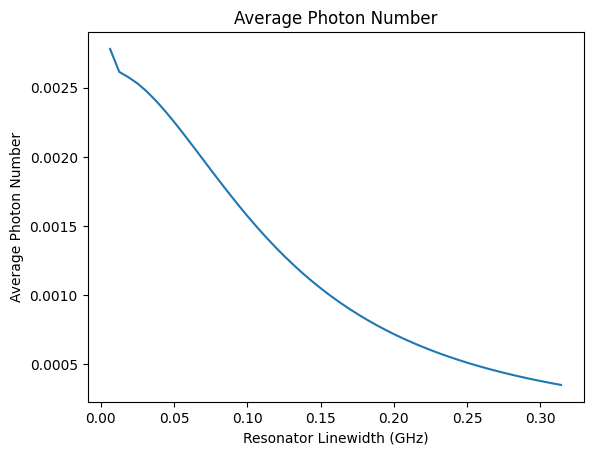

In [5]:
# Plot Results

kappa_list = np.array([2 * np.pi * 0.001 * (i+1) for i in range(50)])
plt.plot(kappa_list, photon_list)

plt.title('Average Photon Number')
plt.xlabel('Resonator Linewidth (GHz)')
plt.ylabel('Average Photon Number')

# CP CPMG UDD XY4 XY8 XY16 Sequence

In [6]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    [[   7.56379775,   19.18454147,   30.81580265,   42.43623895], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq

In [7]:
# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

## CP CPMG UDD Sequence

In [8]:
# CP (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CP_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0)

    return pulse

In [9]:
# CPMG (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def CPMG_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    N = args['N_seq']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, N)
    pulse = 0

    for T_cent in Seq:
      pulse = pulse + Single_pulse(t, B, Omega_qd, T_cent, 0.5*np.pi)

    return pulse

## XY4 XY8 XY16 Sequence

In [10]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 4)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [11]:
# XY4 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY4_lab_frame_op1(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']
    kappa = args['kappa']

    # T_cent
    Seq = Pulse_Timing_op1(T_srt, T_end, 4, kappa)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 1.0*np.pi)

    return pulse

In [12]:
# XY8 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY8_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 8)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 1.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 1.0*np.pi)

    return pulse

In [13]:
# XY16 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)

def XY16_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    T_srt = args['T_srt_q']
    T_end = args['T_end_q']
    B = args['B']

    # T_cent
    Seq = Pulse_Timing(T_srt, T_end, 16)
    pulse = 0

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[0], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[2], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[3], 0.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[4], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[5], 0)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[6], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[7], 0)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[8], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[9], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[10], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[11], 1.5*np.pi)

    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[12], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[13], np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[14], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Seq[15], np.pi)

    return pulse

# Sequence Optimization Cost Function 1

## Setting

In [14]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [15]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [22]:
def Pulse_Timing_op1(T_srt, T_end, N, kappa):

  if 2*np.pi*0.0475 <kappa < 2*np.pi*0.0525:
    Tot_Seq = [[  7.95252834,   19.3121193,    30,   40], \
    [  17.58641498,   39.10664382,   60.89332269,   82.41364138], \
    [  28.42527759,   58.6092418,    91.3907877,   121.57486096], \
    [  44.83978102,   75.40872388,  124.5943459,   155.16307948], \
    [  63.7742821,    90.86660797,  159.19392938,  186.28649866], \
    [  80.20239063,  105.09314324,  194.9511213,   219.84199554], \
    [ 116.64181954,  139.95595252,  222.55757254,  245.87171989], \
    [  94.98179033,  117.06247698,  293.26957667,  315.35036567], \
    [ 101.37035816,  122.43265352,  323.98990557,  345.05217687], \
    [ 121.90814651,  142.10152031,  356.97992221,  377.17314639], \
    [ 201.58075504,  221.015168,    336.46962602,  355.90389045], \
    [ 129.45199465,  148.21324736,  439.8859347,   458.64745206], \
    [ 131.53997819,  149.69567383,  319.13957299,  337.29534247], \
    [ 272.14954101,  289.75341025,  432.7945287,   450.39846539], \
    [ 165.30470401,  182.40402388,  370.99858516,  388.0977086 ], \
    [ 200.33470847,  216.96654563,  579.36292,     595.99458579], \
    [ 202.56373135,  218.76199596,  616.28077822,  632.47915774], \
    [ 191.10762247,  206.90041143,  462.90716274,  478.70008975], \
    [ 172.99941484,  188.41159704,  816.18552924,  831.59781038], \
    [ 386.52757543,  401.58184565,  614.64422353,  629.6985514 ], \
    [ 236.24649001,  250.96172312,  775.7526202,   790.46800729], \
    [ 196.27169895,  210.66570908,  956.34736789,  970.74121962], \
    [ 244.41435283,  258.503446,    572.39644387,  586.48561878], \
    [ 468.46168684,  482.25962684,  757.21413444,  771.01189564], \
    [ 676.55951983,  690.07885479,  825.39367813,  838.91308511], \
    [ 300.41371338,  313.66719741,  944.17145679,  957.42512648], \
    [ 374.49278061,  387.49111683, 1047.58482342, 1060.58324652], \
    [ 294.93835882,  307.69116276, 1246.00335955, 1258.75632414], \
    [ 346.61600192,  359.13286997,  736.25472932,  748.77148375], \
    [ 591.9695934,   604.25919776,  933.77304734,  946.06257243], \
    [1111.55836211, 1123.62877456, 1395.36196844, 1407.43243611], \
    [ 419.10987749,  430.96817453,  791.84864753,  803.70683106], \
    [ 892.87703613,  904.52996193, 1085.47993957, 1097.13283044], \
    [ 134.36548107,  145.8198101,   840.03126708,  851.48575307], \
    [ 957.69786648,  968.95999394, 1156.46144552, 1167.72368651], \
    [ 382.41171394,  393.48743435, 1603.54910896, 1614.6247046 ], \
    [1230.45466456, 1241.34901665, 1692.0223838,  1702.91673351], \
    [1322.42007727, 1333.13779892, 1747.0941824,  1757.81185786], \
    [ 140.32512518,  150.8712731,   968.90609394,  979.45224691], \
    [1434.36649808, 1444.74584,    1851.24564916, 1861.62507475]]

  elif 2*np.pi*0.0425 <kappa < 2*np.pi*0.0475:
    Tot_Seq = [[   7.83279527,   19.27260066,   30,   40], \
    [  17.33195221,   39.04271775,   60.95714509,   82.66792232], \
    [  27.77174651,   58.70716372,   91.29265171,  122.22821939], \
    [  41.96761673,   76.58938572,  123.41123185,  158.03312763], \
    [  61.15812969,   92.01722509,  158.00665819,  188.86576396], \
    [  79.50269743,  107.62955722,  192.37284473,  220.49967935], \
    [ 107.8468917,   134.08124557,  227.70286428,  253.93734186], \
    [ 134.83525883,  159.61846026,  253.7863695,   278.56977162], \
    [ 113.71898094, 137.31988727,  332.06722067,   355.66797178], \
    [ 122.12873603,  144.72948619,  364.64147413,  387.24235424], \
    [ 133.46855036,  155.20176205,  404.94936034,  426.68271617], \
    [ 143.46269708,  164.42886806,  444.74284896,  465.70905386], \
    [ 129.32621149,  149.60353701,  321.28381402,  341.56117217], \
    [ 268.16469204,  287.81745294,  437.90677259,  457.55954709], \
    [ 198.3123264 ,  217.39408419,  551.2272122,   570.30916144], \
    [ 140.08334948,  158.63770115,  423.73384089,  442.28801215], \
    [ 180.25625671,  198.32195861,  428.38489131,  446.45070092], \
    [ 351.32515421,  368.93427112,  564.03188811,  581.64086402], \
    [ 247.40440956,  264.58602083,  715.90948406,  733.09093315], \
    [ 398.09559726,  414.87453333,  624.94442784,  641.72328922], \
    [ 259.25096509,  275.64931942,  793.87963569,  810.27805903], \
    [ 426.43080264,  442.46926342,  685.61429612,  701.65294487], \
    [ 273.42531832,  289.12123248,  857.27775614,  872.9737403 ], \
    [ 289.3717708,   304.74154325,  862.20151742,  877.57112834], \
    [ 230.81990052,  245.87862359, 1069.46102418, 1084.51961041], \
    [ 304.01242282,  318.77290328,  667.02031211,  681.78063185], \
    [ 742.95442498,  757.42894514,  882.66989113,  897.14451098], \
    [ 314.38455576,  328.58504135,  718.19348047,  732.39405055], \
    [ 240.22468486,  254.1613432,  1236.1963923,  1250.13315481], \
    [ 816.62131678,  830.30347378,  976.22114916,  989.90342668], \
    [ 327.41937098,  340.85622325,  760.06290281,  773.49980415], \
    [ 863.36533556,  876.56553878, 1058.27449734, 1071.47471354], \
    [ 893.08565227,  906.05711361, 1075.96501366, 1088.93640962], \
    [ 357.14559897,  369.89520285,  852.88744558,  865.63691872], \
    [ 712.26614415,  724.80052149, 1100.01763344, 1112.55209172], \
    [1250.54410003, 1262.87007453, 1666.32686102, 1678.65293664], \
    [ 735.52504739,  747.64894033, 1149.29574173, 1161.41983989], \
    [ 344.26402512,  356.19141126, 1650.98136583, 1662.90872537], \
    [ 473.82814691,  485.56405931, 1454.55657171, 1466.29251795], \
    [1417.32176676, 1428.87124845, 1843.09370005, 1854.64332734]]

  elif 2*np.pi*0.0375 <kappa < 2*np.pi*0.0425:
    Tot_Seq = [[   7.70360204,   19.23043421,   30,   40], \
    [  17.0475113,    38.96418242,   61.03590067,   82.95243078], \
    [  27.20896282,   58.71357094,   91.28625743,  122.79095077], \
    [  39.430764,     77.55970509,  122.44039193,  160.56940587], \
    [  57.60580654,   93.48723412,  156.51871056,  192.40008779], \
    [  76.49366155,  108.88103875,  191.14087495,  223.52800759], \
    [  94.37415257,  124.39522616,  225.67437457,  255.69533377], \
    [ 125.89631743,  154.1538525,   258.71571977,  286.97307663], \
    [ 153.91003969,  180.75744319,  287.06203877,  313.90962387], \
    [ 117.38833875,  143.0564409,   365.25138017,  390.91957228], \
    [ 132.32036064,  156.97326472,  401.99107448,  426.64420691], \
    [ 132.23257105,  155.99333234,  446.13492835,  469.8958326], \
    [ 157.66457315,  180.62861958,  477.74480117,  500.70897877], \
    [ 261.70493127,  283.94844103,  433.37739817,  455.62089101], \
    [ 198.78409895,  220.36987533,  563.47335912,  585.05929123], \
    [ 201.89878639,  222.88018023,  597.3249649,   618.30624028], \
    [ 214.88748111,  235.30807835,  619.49707872,  639.91756647], \
    [ 192.99739963,  212.89611844,  454.8017605,   474.70062797], \
    [ 205.99946184,  225.40944453,  479.91001795,  499.31983603], \
    [ 397.47442464,  416.42541131,  629.13824076,  648.08907299], \
    [ 182.55290806,  201.07005861,  887.2885872,   905.80556253], \
    [ 218.28914463,  236.39607113,  551.24327558,  569.35037931], \
    [ 286.08456352,  303.80199662,  852.68061684,  870.39794212], \
    [ 472.97026972,  490.31658829,  737.51201092,  754.85847275], \
    [ 281.46480021,  298.45766984,  593.99058267,  610.98341005], \
    [ 303.7448458,   320.39893393,  631.58799852,  648.2421625], \
    [ 530.4136231,   546.74359682,  840.38497979,  856.71473484], \
    [ 255.39732381,  271.41624328, 1190.66647782, 1206.68519566], \
    [ 313.23636679,  328.95572948,  729.18461873,  744.90401381], \
    [ 811.45856974,  826.88950259,  983.12787147,  998.55901957], \
    [ 345.27076293,  360.42427108,  784.37353296,  799.52690422], \
    [ 294.92509693,  309.81025546, 1374.68885284, 1389.57382531], \
    [ 321.08406281,  335.7095184,  1406.20849892, 1420.83401406], \
    [ 424.147726,    438.52213786,  836.84914401,  851.2236113], \
    [ 321.66824831,  335.79964488, 1500.40775062, 1514.53918238], \
    [ 317.09045936,  330.98604984, 1560.98100691, 1574.87662946], \
    [1005.91536132, 1019.58183059, 1209.6242817,  1223.29077104], \
    [ 398.45570367,  411.89962625,  954.19132633,  967.63540408], \
    [ 782.39204797,  795.61992044, 1236.26945755, 1249.4974976], \
    [ 357.20306246,  370.22066583, 1717.63137532, 1730.64882066]]

  elif 2*np.pi*0.0325 <kappa < 2*np.pi*0.0375:
    Tot_Seq = [[   7.56379775,   19.18454147,   30,   40], \
    [  16.72370156,   38.86828663,   61.13148511,   83.27613567], \
    [  26.65786002,   58.65239575,   91.34769663,  123.34222715], \
    [  37.71806595,   78.04254701,  121.95759963,  162.28209823], \
    [  53.0660413,    95.35817264,  154.64147516,  196.93360622], \
    [  72.4440124,   110.72033347,  189.30217927,  227.57812964], \
    [  91.1621584,   126.31349729,  223.73463944,  258.88571231], \
    [ 108.89290053,  141.79533665,  258.77949589,  291.68179972], \
    [ 140.25872205,  171.41025488,  293.30344779,  324.4551065], \
    [ 168.86579157,  198.57894525,  318.86041192,  348.573368], \
    [ 120.63372677,  149.12294144,  389.32475757,  417.81418062], \
    [ 149.14855917,  176.57133937,  442.24525929,  469.66805516], \
    [ 163.13533821,  189.61131423,  475.55556219,  502.03148118], \
    [ 171.46706766,  197.09156936,  504.35692775,  529.98136787], \
    [ 177.83923106,  202.68963781,  381.90040271,  406.75093964], \
    [ 218.67097264,  242.81149864,  594.24636329,  618.38663514], \
    [ 216.00928042,  239.49322221,  629.00734075,  652.49132555], \
    [ 347.92336109,  370.79761857,  553.82324847,  576.69761114], \
    [ 200.16326472,  222.46771565,  485.67172743,  507.9762147], \
    [ 217.18885734,  238.95840911,  495.8461267,   517.61579526], \
    [ 403.42149527,  424.68708438,  646.38079062,  667.64643488], \
    [ 232.10587993,  252.89511405,  548.00653216,  568.79569451], \
    [ 254.13100105,  274.46803552,  573.88842768,  594.22554002], \
    [ 468.03001256,  487.93731107,  750.00361542,  769.91108224], \
    [ 343.93063352,  363.42806627,  937.91822969,  957.41552971], \
    [ 288.28608428,  307.39200874,  643.70567279,  662.81165822], \
    [ 532.19418732,  550.92512579,  839.7404034,   858.4713223], \
    [ 555.83732493,  574.20861317,  875.49894409,  893.87035455], \
    [ 381.73739181,  399.76331294, 1110.54995747, 1128.57573139], \
    [ 365.30442745,  382.99747254,  741.35089047,  759.04378034], \
    [ 289.29062627,  306.66307049, 1317.99972396, 1335.37202012], \
    [ 284.60711217,  301.67030421, 1335.5613317,  1352.62447611], \
    [ 661.54644939,  678.31046582, 1017.22095434, 1033.98500866], \
    [ 320.3254542,   336.8001502,  1437.99300293, 1454.46761201], \
    [ 342.49751183,  358.69205559, 1506.66349848, 1522.85819181], \
    [ 497.98314684,  513.90611887, 1344.80119162, 1360.72425166], \
    [ 396.01362765,  411.67288125,  915.8158793,   931.4752976], \
    [ 766.82351966,  782.22683026, 1177.61606379, 1193.01926405], \
    [1061.75407701, 1076.90880026, 1272.28182837, 1287.4365456], \
    [1080.51893156, 1095.43159037, 1326.20940117, 1341.12192883]]


  if T_end < 75 :
    Seq_list = Tot_Seq[0]

  elif 75 < T_end < 125 :
    Seq_list = Tot_Seq[1]

  elif 125 < T_end < 175 :
    Seq_list = Tot_Seq[2]

  elif 175 < T_end < 225 :
    Seq_list = Tot_Seq[3]

  elif 225 < T_end < 275 :
    Seq_list = Tot_Seq[4]

  elif 275 < T_end < 325 :
    Seq_list = Tot_Seq[5]

  elif 325 < T_end < 375 :
    Seq_list = Tot_Seq[6]

  elif 375 < T_end < 425 :
    Seq_list = Tot_Seq[7]

  elif 425 < T_end < 475 :
    Seq_list = Tot_Seq[8]

  elif 475 < T_end < 525 :
    Seq_list = Tot_Seq[9]

  elif 525 < T_end < 575 :
    Seq_list = Tot_Seq[10]

  elif 575 < T_end < 625 :
    Seq_list = Tot_Seq[11]

  elif 625 < T_end < 675 :
    Seq_list = Tot_Seq[12]

  elif 675 < T_end < 725 :
    Seq_list = Tot_Seq[13]

  elif 725 < T_end < 775 :
    Seq_list = Tot_Seq[14]

  elif 775 < T_end < 825 :
    Seq_list = Tot_Seq[15]

  elif 825 < T_end < 875 :
    Seq_list = Tot_Seq[16]

  elif 875 < T_end < 925 :
    Seq_list = Tot_Seq[17]

  elif 925 < T_end < 975 :
    Seq_list = Tot_Seq[18]

  elif 975 < T_end < 1025 :
    Seq_list = Tot_Seq[19]

  elif 1025 < T_end < 1075 :
    Seq_list = Tot_Seq[20]

  elif 1075 < T_end < 1125 :
    Seq_list = Tot_Seq[21]

  elif 1125 < T_end < 1175 :
    Seq_list = Tot_Seq[22]

  elif 1175 < T_end < 1225 :
    Seq_list = Tot_Seq[23]

  elif 1225 < T_end < 1275 :
    Seq_list = Tot_Seq[24]

  elif 1275 < T_end < 1325 :
    Seq_list = Tot_Seq[25]

  elif 1325 < T_end < 1375 :
    Seq_list = Tot_Seq[26]

  elif 1375 < T_end < 1425 :
    Seq_list = Tot_Seq[27]

  elif 1425 < T_end < 1475 :
    Seq_list = Tot_Seq[28]

  elif 1475 < T_end < 1525 :
    Seq_list = Tot_Seq[29]

  elif 1525 < T_end < 1575 :
    Seq_list = Tot_Seq[30]

  elif 1575 < T_end < 1625 :
    Seq_list = Tot_Seq[31]

  elif 1625 < T_end < 1675 :
    Seq_list = Tot_Seq[32]

  elif 1675 < T_end < 1725 :
    Seq_list = Tot_Seq[33]

  elif 1725 < T_end < 1775 :
    Seq_list = Tot_Seq[34]

  elif 1775 < T_end < 1825 :
    Seq_list = Tot_Seq[35]

  elif 1825 < T_end < 1875 :
    Seq_list = Tot_Seq[36]

  elif 1875 < T_end < 1925 :
    Seq_list = Tot_Seq[37]

  elif 1925 < T_end < 1975 :
    Seq_list = Tot_Seq[38]

  elif 1975 < T_end < 2025 :
    Seq_list = Tot_Seq[39]


  Seq = np.array(Seq_list)

  return Seq


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq

In [23]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)


# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Func1 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func1_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    Time_Seq = Pulse_Timing(0, T, N)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


# Func2 (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func2_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Theta_Seq = args['Theta_seq']
    T = args['Total_time']
    kappa = args['kappa']
    Time_Seq = Pulse_Timing_op1(0, T, N, kappa)

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], Theta_Seq[0])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], Theta_Seq[1])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], Theta_Seq[2])
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], Theta_Seq[3])

    return pulse


def cost_func1(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func1_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def cost_func2(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func2_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Theta_seq': params, 'Total_time': T, 'kappa': kappa},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)


def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func1(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Optimization

In [24]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = np.array([0, 0.5*np.pi, 1.5*np.pi, 1*np.pi])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func1,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[0.         1.57079633 4.71238898 3.14159265]
[0.         1.57079633 4.71238898 3.14159265]
0.8461348297889647

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[1.         1.57079633 4.71238898 3.14159265]
0.8286559965633126

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         2.57079633 4.71238898 3.14159265]
0.7951587515231366

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 3.14159265]
0.8536944243318972

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[0.         1.57079633 5.71238898 4.14159265]
0.8523760671037935

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[-0.32110706  0.63430482  5.85126777  3.11737286]
0.8025197358440874

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[0.49328678 1.49004739 5.7243638  3.1395043 ]
0.8238632312800326

[-0.27801082  1.98407361  5.75546383  3.1340806 ]
0.8455967479681041

[-0.27801082  1.98

In [25]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8682237440344841
       x: [ 6.817e-01  2.610e+00  5.440e+00  2.453e+00]
    nfev: 81
   maxcv: 0.0

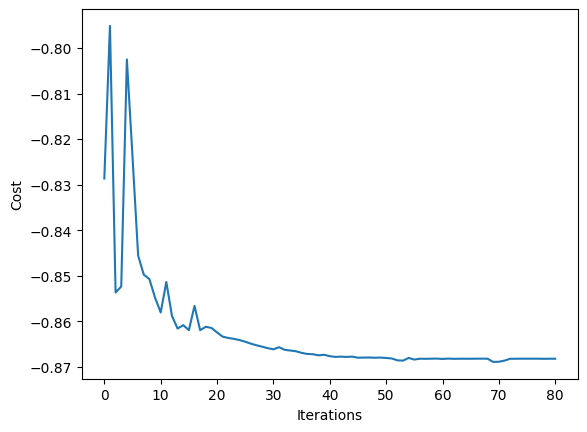

In [26]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Sequence Optimization

B=0.05

## Setting

In [ ]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [ ]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [ ]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Func (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Time_Seq = args['Time_seq']
    T = args['Total_time']

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], 0.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], 1.0*np.pi)


    return pulse

def cost_func(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Time_seq': 10*params, 'Omega_qd': omega_qd0, 'Total_time': T},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)

def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 2.5  7.5 12.5 17.5]
[ 2.5  7.5 12.5 17.5]
0.6761669016549343

[ 3.5  7.5 12.5 17.5]
0.6767459747348207

[ 3.5  7.5 12.5 17.5]nt cost: -0.6767459747348207]
0.6767459747348207

[ 3.5  8.5 12.5 17.5]
0.6763425396757529

[ 3.5  8.5 12.5 17.5]nt cost: -0.6763425396757529]
0.6763425396757529

[ 3.5  7.5 13.5 17.5]
0.67737916148403

[ 3.5  7.5 13.5 17.5]nt cost: -0.67737916148403]
0.67737916148403

[ 3.5  7.5 13.5 18.5]
0.6771482452729268

[ 3.5  7.5 13.5 18.5]nt cost: -0.6771482452729268]
0.6771482452729268

[ 4.0933882   7.08659172 14.1488396  17.26337537]
0.6779896463927202

[ 4.0933882   7.08659172 14.1488396  17.26337537]]
0.6779896463927202

[ 4.04672095  6.57354732 14.95405697 16.96972149]
0.6815749791405575

[ 4.04672095  6.57354732 14.95405697 16.96972149]]
0.6815749791405575

[ 3.50306328  5.74039653 15.04938525 16.93495632]
0.6796552314573331

[ 3.50306328  5.74039653 15.04938525 16.93495632]]
0.6796552314573331

[ 4.04672095  6.57354732 15.12536512 17.4394592 ]
0.678641512256432

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.681662521083845
       x: [ 4.047e+00  6.575e+00  1.495e+01  1.697e+01]
    nfev: 48
   maxcv: 0.0

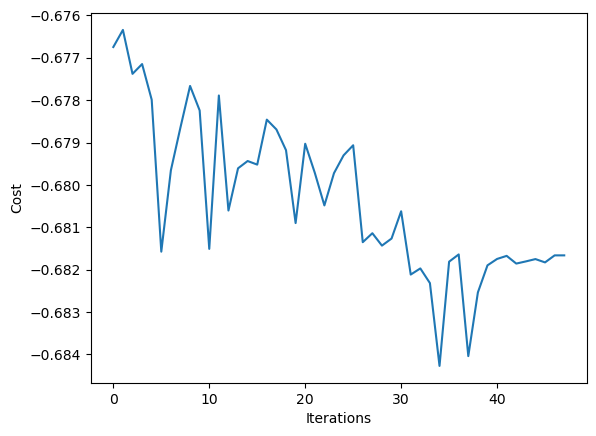

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 8, 12, 16])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4  8 12 16]
[ 4.  8. 12. 16.]
0.6764831019837306

[ 5.  8. 12. 16.]
0.677680438200853

[ 5.  8. 12. 16.]urrent cost: -0.677680438200853]
0.677680438200853

[ 5.  9. 12. 16.]
0.6770726912119199

[ 5.  9. 12. 16.]urrent cost: -0.6770726912119199]
0.6770726912119199

[ 5.  8. 13. 16.]
0.6790423555923989

[ 5.  8. 13. 16.]urrent cost: -0.6790423555923989]
0.6790423555923989

[ 5.  8. 13. 17.]
0.6785702704177047

[ 5.  8. 13. 17.]urrent cost: -0.6785702704177047]
0.6785702704177047

[ 5.60780416  7.6914892  13.69135055 15.76035525]
0.6792884370340586

[ 5.60780416  7.6914892  13.69135055 15.76035525]]
0.6792884370340586

[ 4.8844329   7.42323881 14.29248044 15.55198395]
0.678957695831612

[ 4.8844329   7.42323881 14.29248044 15.55198395]
0.678957695831612

[ 5.5402158   8.16740243 13.7886604  15.66304541]
0.6770531640602606

[ 5.5402158   8.16740243 13.7886604  15.66304541]]
0.6770531640602606

[ 5.93851111  6.77946475 13.64577282 15.99861346]
0.6750015439868333

[ 5.93851111  6.77946475 

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6823622399594185
       x: [ 5.668e+00  7.646e+00  1.368e+01  1.552e+01]
    nfev: 45
   maxcv: 0.0

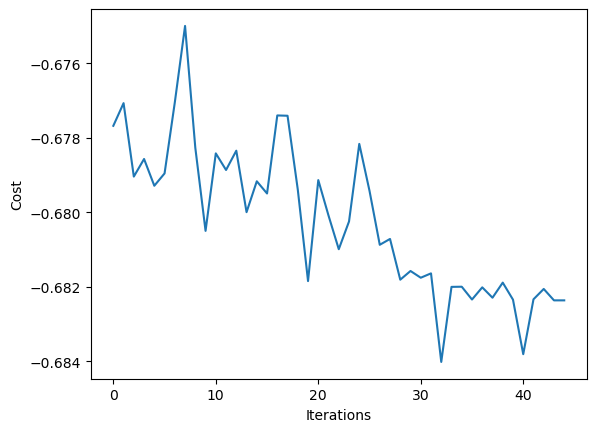

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 400
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 5. 15. 25. 35.]
[ 5. 15. 25. 35.]
0.5008811096961293

[ 6. 15. 25. 35.]
0.5010190761842074

[ 6. 15. 25. 35.]urrent cost: -0.5010190761842074]
0.5010190761842074

[ 6. 16. 25. 35.]
0.5008528624877758

[ 6. 16. 25. 35.]urrent cost: -0.5008528624877758]
0.5008528624877758

[ 6. 15. 26. 35.]
0.5016330893628249

[ 6. 15. 26. 35.]urrent cost: -0.5016330893628249]
0.5016330893628249

[ 6. 15. 26. 36.]
0.5021586487978996

[ 6. 15. 26. 36.]urrent cost: -0.5021586487978996]
0.5021586487978996

[ 6.16491485 14.80132055 26.73394554 36.62821454]
0.5035087551782229

[ 6.16491485 14.80132055 26.73394554 36.62821454]]
0.5035087551782229

[ 5.70363365 15.25216608 27.47303868 36.82237761]
0.5036370815634196

[ 5.70363365 15.25216608 27.47303868 36.82237761]]
0.5036370815634196

[ 5.3437457  14.90530746 27.46000935 36.82237761]
0.5041226036938707

[ 5.3437457  14.90530746 27.46000935 36.82237761]]
0.5041226036938707

[ 5.37096549 14.10334773 27.9853461  37.10546943]
0.5046648662201282

[ 5.37096549 14

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.5051113815492592
       x: [ 5.143e+00  1.386e+01  2.781e+01  3.804e+01]
    nfev: 51
   maxcv: 0.0

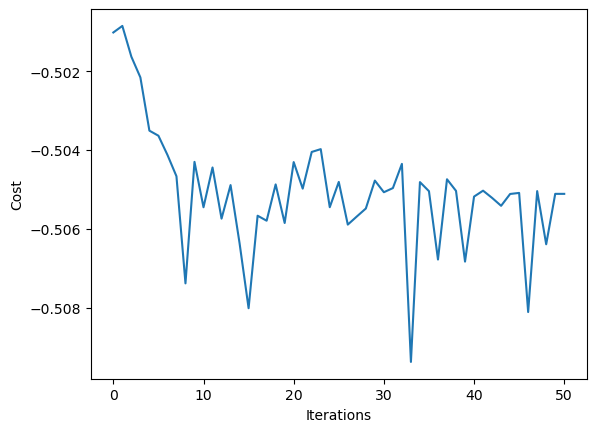

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 400
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 13, 22, 31])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4 13 22 31]
[ 4. 13. 22. 31.]
0.5043792816527477

[ 5. 13. 22. 31.]
0.5007149466748422

[ 5. 13. 22. 31.]urrent cost: -0.5007149466748422]
0.5007149466748422

[ 4. 14. 22. 31.]
0.5021329086065519

[ 4. 14. 22. 31.]urrent cost: -0.5021329086065519]
0.5021329086065519

[ 4. 13. 23. 31.]
0.5026968555690053

[ 4. 13. 23. 31.]urrent cost: -0.5026968555690053]
0.5026968555690053

[ 4. 13. 22. 32.]
0.5052728517770577

[ 4. 13. 22. 32.]urrent cost: -0.5052728517770577]
0.5052728517770577

[ 3.22057595 12.52218419 21.64213879 32.19006724]
0.5003087249028388

[ 3.22057595 12.52218419 21.64213879 32.19006724]]
0.5003087249028388

[ 4.47379832 12.87817377 21.90875797 32.04846046]
0.5010216378526736

[ 4.47379832 12.87817377 21.90875797 32.04846046]]
0.5010216378526736

[ 4.         13.14986578 21.79989941 32.        ]
0.5020377135337352

[ 4.         13.14986578 21.79989941 32.        ]]
0.5020377135337352

[ 3.88834737 13.09470159 22.4775565  32.02247414]
0.5011478786934263

[ 3.88834737 13.094

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.5017043035499199
       x: [ 4.000e+00  1.300e+01  2.200e+01  3.200e+01]
    nfev: 40
   maxcv: 0.0

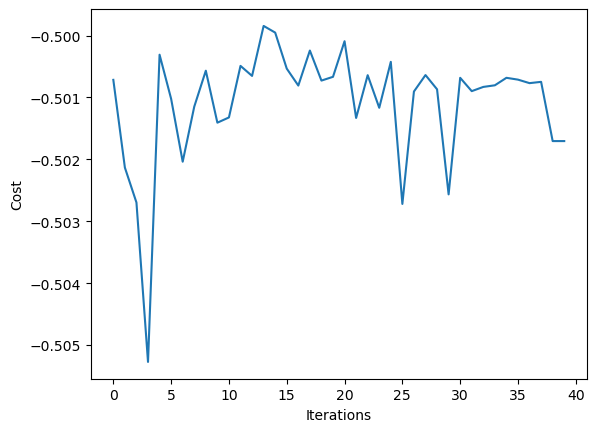

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 2.5  7.5 12.5 17.5]
[ 2.5  7.5 12.5 17.5]
0.2235705331470543

[ 3.5  7.5 12.5 17.5]
0.22863392104983143

[ 3.5  7.5 12.5 17.5]nt cost: -0.22863392104983143]
0.22863392104983143

[ 3.5  8.5 12.5 17.5]
0.2269342320869845

[ 3.5  8.5 12.5 17.5]nt cost: -0.2269342320869845]
0.2269342320869845

[ 3.5  7.5 13.5 17.5]
0.23182031569320383

[ 3.5  7.5 13.5 17.5]nt cost: -0.23182031569320383]
0.23182031569320383

[ 3.5  7.5 13.5 18.5]
0.22890346944919332

[ 3.5  7.5 13.5 18.5]nt cost: -0.22890346944919332]
0.22890346944919332

[ 4.23709876  7.2525691  13.96385692 17.07538238]
0.23624099130113768

[ 4.23709876  7.2525691  13.96385692 17.07538238]8]
0.23624099130113768

[ 4.58831428  6.90975561 14.60652689 16.48707813]
0.23741809423381524

[ 4.58831428  6.90975561 14.60652689 16.48707813]4]
0.23741809423381524

[ 5.27723846  6.7511822  14.90380333 17.12884496]
0.2350441261493805

[ 5.27723846  6.7511822  14.90380333 17.12884496]]
0.2350441261493805

[ 4.58831428  7.35091607 14.84185103 16.487078

[ 4.72849903  8.40135644 15.02325845 15.52608537]74]
0.24490399850705574

[ 4.72851463  8.40141573 15.02335356 15.52614931]
0.24491431497062346

[ 4.72851463  8.40141573 15.02335356 15.52614931]46]
0.24491431497062346

[ 4.72851463  8.40141573 15.02335356 15.52614931]
0.24491431497062346



In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.24491431497062346
       x: [ 4.729e+00  8.401e+00  1.502e+01  1.553e+01]
    nfev: 60
   maxcv: 0.0

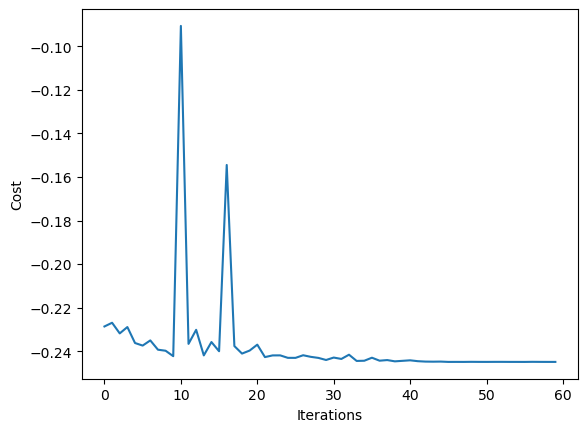

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[49])
T     = 200
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 8, 12, 16])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4  8 12 16]
[ 4.  8. 12. 16.]
0.2304605058728664

[ 5.  8. 12. 16.]
0.2339438745457754

[ 5.  8. 12. 16.]urrent cost: -0.2339438745457754]
0.2339438745457754

[ 5.  9. 12. 16.]
0.23297990283460596

[ 5.  9. 12. 16.]urrent cost: -0.23297990283460596]
0.23297990283460596

[ 5.  8. 13. 16.]
0.2366912402995083

[ 5.  8. 13. 16.]urrent cost: -0.2366912402995083]
0.2366912402995083

[ 5.  8. 13. 17.]
0.23544794436002048

[ 5.  8. 13. 17.]urrent cost: -0.23544794436002048]
0.23544794436002048

[ 5.7400225   7.79520952 13.58366273 15.73586862]
0.2390638655098502

[ 5.7400225   7.79520952 13.58366273 15.73586862]]
0.2390638655098502

[ 5.84330833  7.492354   14.44681552 15.3452565 ]
0.23448498158241682

[ 5.84330833  7.492354   14.44681552 15.3452565 ]2]
0.23448498158241682

[ 5.56121868  8.23030757 13.7034936  15.61603775]
0.2394002519514398

[ 5.56121868  8.23030757 13.7034936  15.61603775]]
0.2394002519514398

[ 6.40534335  8.70960469 13.57883619 15.82143577]
0.24042926968746445

[ 6.40534

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.24248166464589865
       x: [ 6.511e+00  9.048e+00  1.408e+01  1.560e+01]
    nfev: 54
   maxcv: 0.0

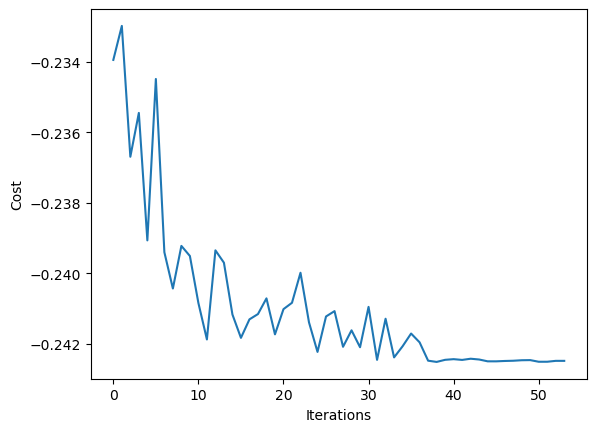

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[24])
T     = 200
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 2.5  7.5 12.5 17.5]
[ 2.5  7.5 12.5 17.5]
0.1694675921629949

[ 3.5  7.5 12.5 17.5]
0.17487672442246793

[ 3.5  7.5 12.5 17.5]nt cost: -0.17487672442246793]
0.17487672442246793

[ 3.5  8.5 12.5 17.5]
0.17472982926485917

[ 3.5  8.5 12.5 17.5]nt cost: -0.17472982926485917]
0.17472982926485917

[ 3.5  7.5 13.5 17.5]
0.17611454231631726

[ 3.5  7.5 13.5 17.5]nt cost: -0.17611454231631726]
0.17611454231631726

[ 3.5  7.5 13.5 18.5]
0.1751152918430882

[ 3.5  7.5 13.5 18.5]nt cost: -0.1751152918430882]
0.1751152918430882

[ 4.45904513  7.47395533 13.71946648 17.32283179]
0.1789365206953466

[ 4.45904513  7.47395533 13.71946648 17.32283179]]
0.1789365206953466

[ 5.29878074  7.42402779 14.14018287 16.98320101]
0.17710440732254662

[ 5.29878074  7.42402779 14.14018287 16.98320101]2]
0.17710440732254662

[ 4.87891294  7.44899156 13.92982468 17.1530164 ]
0.17820772077538305

[ 4.87891294  7.44899156 13.92982468 17.1530164 ]5]
0.17820772077538305

[ 4.45225841  7.22404746 13.71946648 17.322831

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.1818973870964571
       x: [ 4.849e+00  7.764e+00  1.405e+01  1.731e+01]
    nfev: 57
   maxcv: 0.0

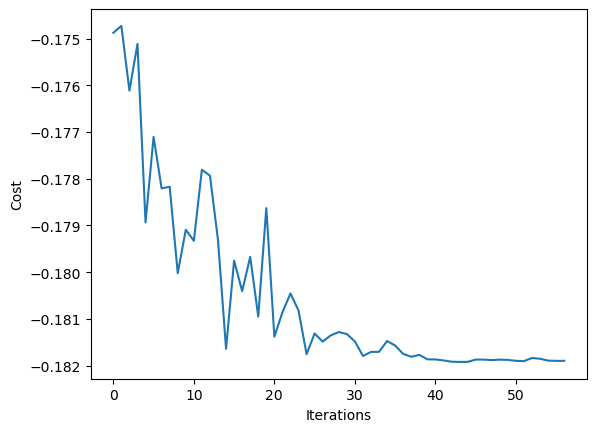

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[24])
T     = 200
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 8, 12, 16])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4  8 12 16]
[ 4.  8. 12. 16.]
0.17256596436780483

[ 5.  8. 12. 16.]
0.1748925447984698

[ 5.  8. 12. 16.]urrent cost: -0.1748925447984698]
0.1748925447984698

[ 5.  9. 12. 16.]
0.17479631330033024

[ 5.  9. 12. 16.]urrent cost: -0.17479631330033024]
0.17479631330033024

[ 5.  8. 13. 16.]
0.17483569346935293

[ 5.  8. 13. 16.]urrent cost: -0.17483569346935293]
0.17483569346935293

[ 5.  8. 12. 17.]
0.1770414658353576

[ 5.  8. 12. 17.]urrent cost: -0.1770414658353576]
0.1770414658353576

[ 5.73414051  7.96963464 11.98206085 17.678081  ]
0.17980150253112298

[ 5.73414051  7.96963464 11.98206085 17.678081  ]8]
0.17980150253112298

[ 6.36926132  7.93509168 11.96165368 18.44945114]
0.1736035088692663

[ 6.36926132  7.93509168 11.96165368 18.44945114]]
0.1736035088692663

[ 5.71347729  7.4700618  11.98206085 17.678081  ]
0.17590633582848564

[ 5.71347729  7.4700618  11.98206085 17.678081  ]4]
0.17590633582848564

[ 5.98702815  8.90158801 11.9751893  17.93781848]
0.1806068917501813

[ 5.98

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.1831050252107399
       x: [ 6.344e+00  8.882e+00  1.198e+01  1.829e+01]
    nfev: 55
   maxcv: 0.0

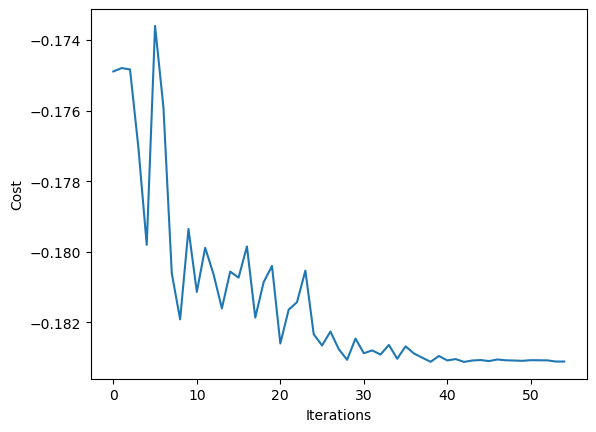

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Sequence Optimization

## Setting

In [ ]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [ ]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [ ]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Func (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Time_Seq = args['Time_seq']
    T = args['Total_time']

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], 0.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], 1.0*np.pi)


    return pulse

def cost_func(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Time_seq': 10*params, 'Omega_qd': omega_qd0, 'Total_time': T},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)

def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[1.25 3.75 6.25 8.75]
[1.25 3.75 6.25 8.75]
0.8461193184217569

[2.25 3.75 6.25 8.75]
0.8479420463595494

[2.25 3.75 6.25 8.75]nt cost: -0.8479420463595494]
0.8479420463595494

[2.25 4.75 6.25 8.75]
0.8475202337411939

[2.25 4.75 6.25 8.75]nt cost: -0.8475202337411939]
0.8475202337411939

[2.25 3.75 7.25 8.75]
0.8488266046106903

[2.25 3.75 7.25 8.75]nt cost: -0.8488266046106903]
0.8488266046106903

[2.25 3.75 7.25 9.75]
0.8443607538622572

[2.25 3.75 7.25 9.75]nt cost: -0.8443607538622572]
0.8443607538622572

[2.62031922 3.66430135 7.42971356 7.84268393]
0.6282302415175782

[2.62031922 3.66430135 7.42971356 7.84268393]5782]
0.6282302415175782

[1.75001418 3.74965265 7.25072842 8.74632246]
0.8482852166331891

[1.75001418 3.74965265 7.25072842 8.74632246]1891]
0.8482852166331891

[2.25017368 3.50000006 7.25       8.75      ]
0.848571293964876

[2.25017368 3.50000006 7.25       8.75      ]876]
0.848571293964876

[2.36633295 3.85651396 7.34218798 8.28457246]
0.8473814653796786

[2.3663329

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8504595008808409
       x: [ 2.528e+00  3.808e+00  7.523e+00  8.773e+00]
    nfev: 47
   maxcv: 0.0

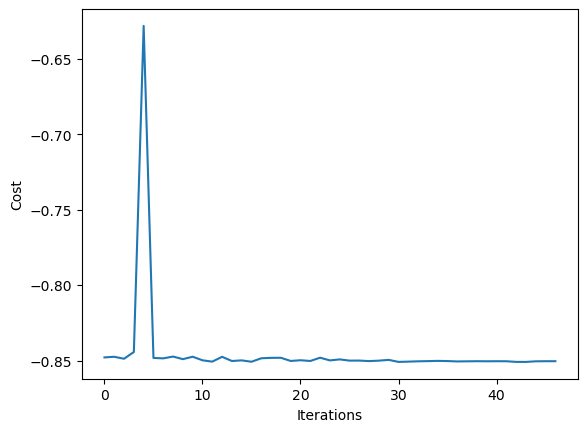

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 5.5, 7, 8.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[4.  5.5 7.  8.5]
[4.  5.5 7.  8.5]
0.8508623475748047

[5.  5.5 7.  8.5]
0.8227930718334828

[5.  5.5 7.  8.5]urrent cost: -0.8227930718334828]
0.8227930718334828

[4.  6.5 7.  8.5]
0.8403423896590752

[4.  6.5 7.  8.5]urrent cost: -0.8403423896590752]
0.8403423896590752

[4.  5.5 8.  8.5]
0.7559985222828489

[4.  5.5 8.  8.5]urrent cost: -0.7559985222828489]
0.7559985222828489

[4.  5.5 7.  9.5]
0.8480924919630759

[4.  5.5 7.  9.5]urrent cost: -0.8480924919630759]
0.8480924919630759

[3.71796966 5.39429911 6.04684121 8.47216945]
0.8441446520127842

[3.71796966 5.39429911 6.04684121 8.47216945]7842]
0.8441446520127842

[3.85898483 5.44714956 6.52342061 8.48608473]
0.8485139997551834

[3.85898483 5.44714956 6.52342061 8.48608473]1834]
0.8485139997551834

[4.24076428 5.49258266 6.93311404 8.49804705]
0.8520558919568877

[4.24076428 5.49258266 6.93311404 8.49804705]8877]
0.8520558919568877

[4.24076428 5.36834425 6.9468915  8.49804705]
0.8515699009406492

[4.24076428 5.36834425 6.946891

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8524783433110804
       x: [ 4.241e+00  5.493e+00  6.932e+00  8.498e+00]
    nfev: 46
   maxcv: 0.0

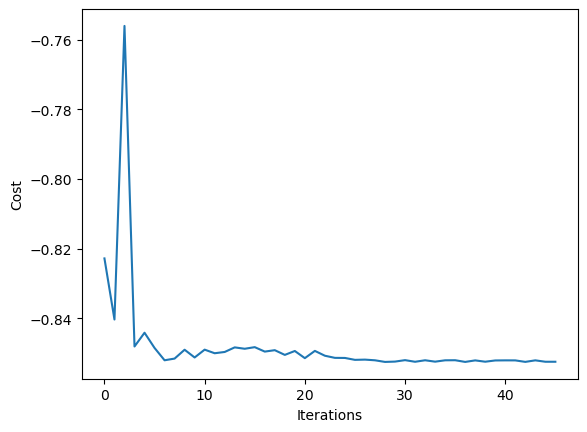

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 500
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 6.25 18.75 31.25 43.75]
[ 6.25 18.75 31.25 43.75]
0.41463604192404474

[ 7.25 18.75 31.25 43.75]
0.41414315985272826

[ 7.25 18.75 31.25 43.75]ost: -0.41414315985272826]
0.41414315985272826

[ 6.25 19.75 31.25 43.75]
0.4143965251595668

[ 6.25 19.75 31.25 43.75]ost: -0.4143965251595668]
0.4143965251595668

[ 6.25 18.75 32.25 43.75]
0.4154315135040432

[ 6.25 18.75 32.25 43.75]ost: -0.4154315135040432]
0.4154315135040432

[ 6.25 18.75 32.25 44.75]
0.4148642438779352

[ 6.25 18.75 32.25 44.75]ost: -0.4148642438779352]
0.4148642438779352

[ 5.8100093  18.53618587 32.96010921 43.2436043 ]
0.4156094773747984

[ 5.8100093  18.53618587 32.96010921 43.2436043 ]]
0.4156094773747984

[ 6.66364711 18.41216756 33.37199287 42.9498803 ]
0.41439281133235173

[ 6.66364711 18.41216756 33.37199287 42.9498803 ]3]
0.41439281133235173

[ 5.83779894 19.02972722 33.01323488 43.19047864]
0.4135862299384051

[ 5.83779894 19.02972722 33.01323488 43.19047864]]
0.4135862299384051

[ 5.41038748 17.62723213 32.90

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.4160760975160528
       x: [ 5.792e+00  1.856e+01  3.297e+01  4.323e+01]
    nfev: 48
   maxcv: 0.0

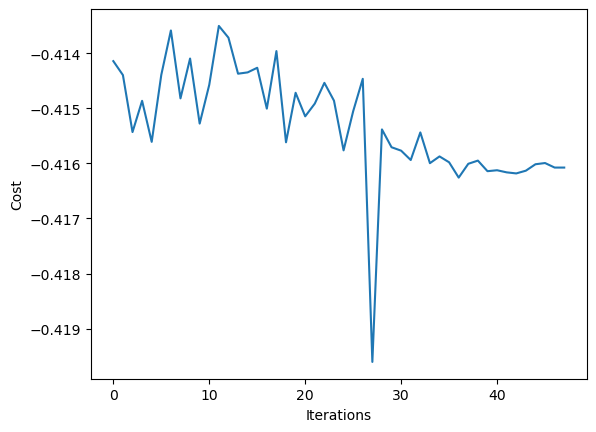

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 500
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 15.5, 27, 38.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4.  15.5 27.  38.5]
[ 4.  15.5 27.  38.5]
0.4155484313376564

[ 5.  15.5 27.  38.5]
0.4135418199698995

[ 5.  15.5 27.  38.5]nt cost: -0.4135418199698995]
0.4135418199698995

[ 4.  16.5 27.  38.5]
0.4157465161633112

[ 4.  16.5 27.  38.5]nt cost: -0.4157465161633112]
0.4157465161633112

[ 4.  16.5 28.  38.5]
0.4161697400727478

[ 4.  16.5 28.  38.5]nt cost: -0.4161697400727478]
0.4161697400727478

[ 4.  16.5 28.  39.5]
0.41539218458280186

[ 4.  16.5 28.  39.5]nt cost: -0.41539218458280186]
0.41539218458280186

[ 3.0887919  16.5899509  28.19218722 38.14690977]
0.41252997654691104

[ 3.0887919  16.5899509  28.19218722 38.14690977]4]
0.41252997654691104

[ 4.48972095 16.52202408 28.04705619 38.41354742]
0.4146621054390946

[ 4.48972095 16.52202408 28.04705619 38.41354742]]
0.4146621054390946

[ 3.98876817 16.74974756 28.         38.5       ]
0.4141467499825514

[ 3.98876817 16.74974756 28.         38.5       ]]
0.4141467499825514

[ 3.83537016 16.03058821 28.02413944 38.45565054]
0.412

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.41394446695460496
       x: [ 4.000e+00  1.650e+01  2.800e+01  3.850e+01]
    nfev: 40
   maxcv: 0.0

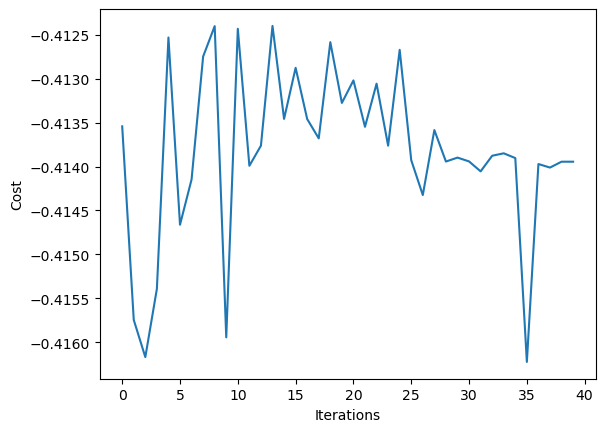

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[1.25 3.75 6.25 8.75]
[1.25 3.75 6.25 8.75]
0.5732000798223357

[2.25 3.75 6.25 8.75]
0.5901605509556331

[2.25 3.75 6.25 8.75]nt cost: -0.5901605509556331]
0.5901605509556331

[2.25 4.75 6.25 8.75]
0.5886110139698724

[2.25 4.75 6.25 8.75]nt cost: -0.5886110139698724]
0.5886110139698724

[2.25 3.75 7.25 8.75]
0.5902815197133114

[2.25 3.75 7.25 8.75]nt cost: -0.5902815197133114]
0.5902815197133114

[2.25 3.75 7.25 9.75]
0.5624942368117333

[2.25 3.75 7.25 9.75]nt cost: -0.5624942368117333]
0.5624942368117333

[2.77039541 3.70245581 7.25371166 7.89740726]
0.5671207076349516

[2.77039541 3.70245581 7.25371166 7.89740726]9516]
0.5671207076349516

[1.77223704 3.7417902  7.25064092 8.60277657]
0.5860250833351295

[1.77223704 3.7417902  7.25064092 8.60277657]1295]
0.5860250833351295

[2.25429533 3.5000369  7.25       8.75      ]
0.5866062134562771

[2.25429533 3.5000369  7.25       8.75      ]2771]
0.5866062134562771

[2.48932156 3.95852727 7.25168178 8.3636857 ]
0.5886286368239846

[2.4893

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6005501798615517
       x: [ 2.741e+00  4.413e+00  7.211e+00  8.886e+00]
    nfev: 56
   maxcv: 0.0

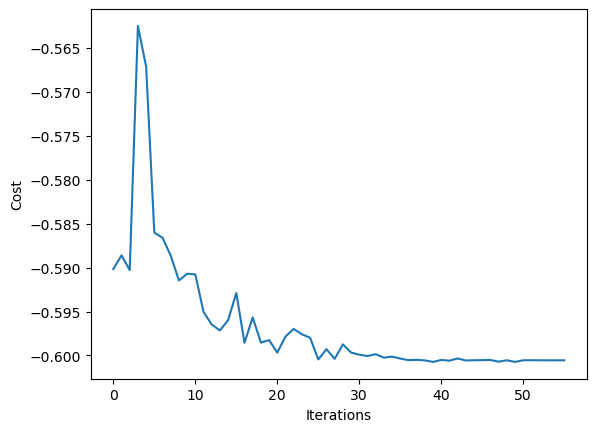

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[49])
T     = 100
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 5.5, 7, 8.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[4.  5.5 7.  8.5]
[4.  5.5 7.  8.5]
0.6042610943699251

[5.  5.5 7.  8.5]
0.5601090379059487

[5.  5.5 7.  8.5]urrent cost: -0.5601090379059487]
0.5601090379059487

[4.  6.5 7.  8.5]
0.5612133194859916

[4.  6.5 7.  8.5]urrent cost: -0.5612133194859916]
0.5612133194859916

[4.  5.5 8.  8.5]
0.5417137736493293

[4.  5.5 8.  8.5]urrent cost: -0.5417137736493293]
0.5417137736493293

[4.  5.5 7.  9.5]
0.5848030001434079

[4.  5.5 7.  9.5]urrent cost: -0.5848030001434079]
0.5848030001434079

[3.50921857 5.02149344 6.30474216 8.28370948]
0.5987482294361649

[3.50921857 5.02149344 6.30474216 8.28370948]1649]
0.5987482294361649

[3.75460928 5.26074672 6.65237108 8.39185474]
0.6027158820467673

[3.75460928 5.26074672 6.65237108 8.39185474]7673]
0.6027158820467673

[4.2200775  5.43486529 6.90536093 8.47055836]
0.5996841981800327

[4.2200775  5.43486529 6.90536093 8.47055836]0327]
0.5996841981800327

[4.         5.6029695  6.92913193 8.5       ]
0.6038901177619547

[4.         5.6029695  6.929131

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6053491923585383
       x: [ 4.040e+00  5.502e+00  7.015e+00  8.492e+00]
    nfev: 54
   maxcv: 0.0

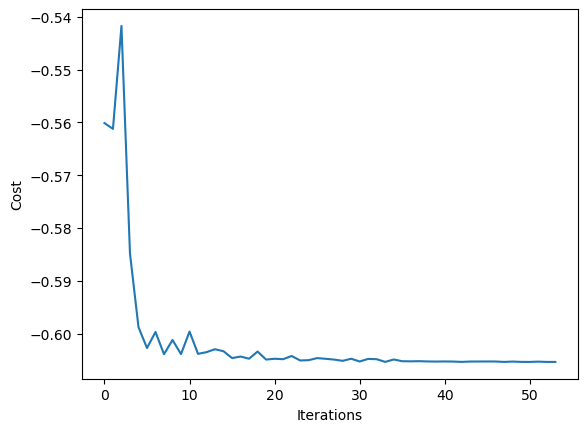

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[24])
T     = 100
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[1.25 3.75 6.25 8.75]
[1.25 3.75 6.25 8.75]
0.5898671550414152

[2.25 3.75 6.25 8.75]
0.610728529909005

[2.25 3.75 6.25 8.75]nt cost: -0.610728529909005]
0.610728529909005

[2.25 4.75 6.25 8.75]
0.6136741945199186

[2.25 4.75 6.25 8.75]nt cost: -0.6136741945199186]
0.6136741945199186

[2.25 4.75 7.25 8.75]
0.607551448311332

[2.25 4.75 7.25 8.75]nt cost: -0.607551448311332]
0.607551448311332

[2.25 4.75 6.25 9.75]
0.5165058405721389

[2.25 4.75 6.25 9.75]nt cost: -0.5165058405721389]
0.5165058405721389

[2.45942104 4.77957064 6.1885356  7.77455624]
0.600650290340891

[2.45942104 4.77957064 6.1885356  7.77455624]891]
0.600650290340891

[2.35471052 4.76478532 6.2192678  8.26227812]
0.6167305891913634

[2.35471052 4.76478532 6.2192678  8.26227812]3634]
0.6167305891913634

[2.59914071 4.76478532 6.2192678  8.31475559]
0.6247126655516435

[2.59914071 4.76478532 6.2192678  8.31475559]6435]
0.6247126655516435

[3.08819692 4.80924048 6.126865   8.33234777]
0.624375986122756

[3.08819692 4.809

[2.73419393 4.70268088 6.51942719 8.66890423]
0.6389564853890225

[2.73419393 4.70268088 6.51942719 8.66890423]90225]
0.6389564853890225

[2.73422852 4.70272577 6.51935511 8.66883636]
0.6389103608828632

[2.73422852 4.70272577 6.51935511 8.66883636]28632]
0.6389103608828632

[2.7340748  4.70269602 6.51940498 8.66891083]
0.6389974709183216

[2.7340748  4.70269602 6.51940498 8.66891083]83216]
0.6389974709183216

[2.73400767 4.70269089 6.51947795 8.66889888]
0.6389906727202573

[2.73400767 4.70269089 6.51947795 8.66889888]02573]
0.6389906727202573

[2.73401261 4.702707   6.51932746 8.66891125]
0.6389901746041622

[2.73401261 4.702707   6.51932746 8.66891125]41622]
0.6389901746041622

[2.73401261 4.702707   6.51932746 8.66891125]
0.6389901746041622



In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6389901746041622
       x: [ 2.734e+00  4.703e+00  6.519e+00  8.669e+00]
    nfev: 66
   maxcv: 0.0

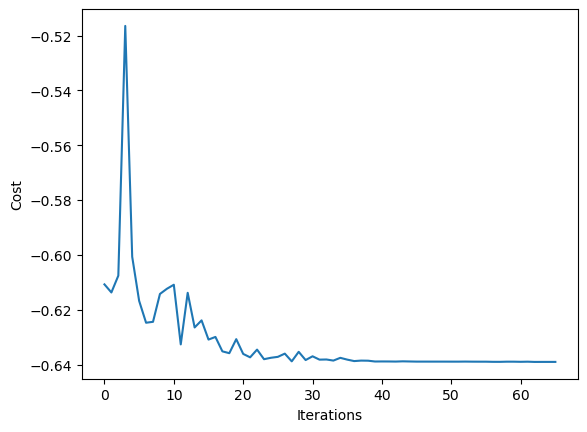

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.1/photon_list[24])
T     = 100
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 5.5, 7, 8.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[4.  5.5 7.  8.5]
[4.  5.5 7.  8.5]
0.6159416721860969

[5.  5.5 7.  8.5]
0.52033207599961

[5.  5.5 7.  8.5]urrent cost: -0.52033207599961]
0.52033207599961

[4.  6.5 7.  8.5]
0.5438082005771163

[4.  6.5 7.  8.5]urrent cost: -0.5438082005771163]
0.5438082005771163

[4.  5.5 8.  8.5]
0.4805429224551762

[4.  5.5 8.  8.5]urrent cost: -0.4805429224551762]
0.4805429224551762

[4.  5.5 7.  9.5]
0.5861527869535363

[4.  5.5 7.  9.5]urrent cost: -0.5861527869535363]
0.5861527869535363

[3.47813215 5.10627237 6.26095019 8.33740271]
0.6177311456230724

[3.47813215 5.10627237 6.26095019 8.33740271]0724]
0.6177311456230724

[3.18905961 4.88817914 6.59375729 8.24733697]
0.6222111379777012

[3.18905961 4.88817914 6.59375729 8.24733697]7012]
0.6222111379777012

[3.33962847 4.68860705 6.59375729 8.24733697]
0.6088622158520001

[3.33962847 4.68860705 6.59375729 8.24733697]0001]
0.6088622158520001

[2.92268621 5.23254916 6.63208224 8.00446725]
0.6024999785158233

[2.92268621 5.23254916 6.63208224 8.0

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6405399740927956
       x: [ 2.925e+00  4.903e+00  6.712e+00  8.785e+00]
    nfev: 55
   maxcv: 0.0

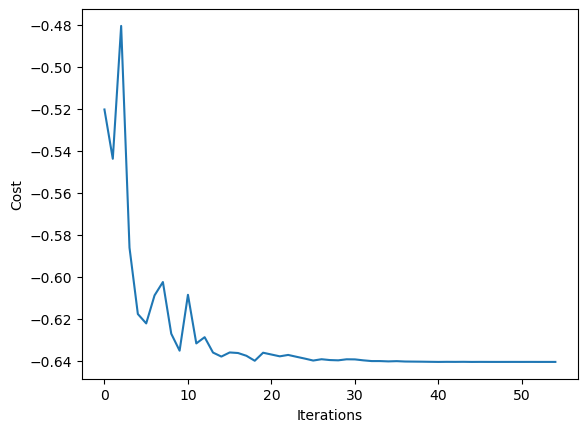

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Sequence Optimization

## Setting

In [ ]:
N = 5

omega_r = 2 * np.pi * 7.0     # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0     # qubit frequency in units of GHz

g = 2 * np.pi * 0.1           # qubit-resonator coupling in units of GHz

detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r            # qubit frequency in units of GHz

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()
a = destroy(N)

sx_bare = tensor(sx, qeye(N))
sy_bare = tensor(sy, qeye(N))
sz_bare = tensor(sz, qeye(N))
sp_bare = tensor(sp, qeye(N))
number_bare = tensor(qeye(2), a.dag()*a)


H0 = -0.5*omega_q*sz_bare + omega_r*number_bare + g*(tensor(sp, a) + tensor(sm, a.dag()))

In [ ]:
sx_dressed = H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1)*H0.eigenstates()[1][4]*(-1)*H0.eigenstates()[1][5].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sy_dressed = + (-1j)*H0.eigenstates()[1][0]*(-1)*H0.eigenstates()[1][1].dag() + (-1j)*H0.eigenstates()[1][2]*H0.eigenstates()[1][3].dag() \
+ (-1j)*H0.eigenstates()[1][4]*H0.eigenstates()[1][5].dag() + (-1j)*H0.eigenstates()[1][6]*H0.eigenstates()[1][7].dag() \
+ (-1)*(-1j)*H0.eigenstates()[1][8]*H0.eigenstates()[1][9].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][1]*H0.eigenstates()[1][0].dag() + (+1j)*H0.eigenstates()[1][3]*H0.eigenstates()[1][2].dag() \
+ (+1j)*H0.eigenstates()[1][5]*H0.eigenstates()[1][4].dag() + (+1j)*H0.eigenstates()[1][7]*H0.eigenstates()[1][6].dag() \
+ (-1)*(+1j)*H0.eigenstates()[1][9]*H0.eigenstates()[1][8].dag() \


sz_dressed = H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() \
+ H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() \
+ H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() \
- H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() - H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
- H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() - H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
- H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


number_dressed = 0*H0.eigenstates()[1][0]*H0.eigenstates()[1][0].dag() + 0*H0.eigenstates()[1][1]*H0.eigenstates()[1][1].dag() \
+ 1*H0.eigenstates()[1][2]*H0.eigenstates()[1][2].dag() + 1*H0.eigenstates()[1][3]*H0.eigenstates()[1][3].dag() \
+ 2*H0.eigenstates()[1][4]*H0.eigenstates()[1][4].dag() + 2*H0.eigenstates()[1][5]*H0.eigenstates()[1][5].dag() \
+ 3*H0.eigenstates()[1][6]*H0.eigenstates()[1][6].dag() + 3*H0.eigenstates()[1][7]*H0.eigenstates()[1][7].dag() \
+ 4*H0.eigenstates()[1][8]*H0.eigenstates()[1][8].dag() + 4*H0.eigenstates()[1][9]*H0.eigenstates()[1][9].dag() \


psi0 = H0.eigenstates()[1][0]
psi1 = (-1)*H0.eigenstates()[1][1]
psis = (psi0 + psi1)/np.sqrt(2)


H1 = tensor(qeye(2), a + a.dag())
H2 = sx_bare

op_list = [sx_dressed, sy_dressed, sz_dressed, number_dressed]

omega_qd0 = 2 * np.pi * 5.9901545

## XY4 Pulse Sequence Setting

Change sequences

In [ ]:
# time-dependent coefficient for resonator drive

def Hrd_rotating_frame(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T_srt = args['T_srt_r'] # duration of the readout drive, in units of ns
    T_end = args['T_end_r'] # duration of the readout drive, in units of ns

    return A * (T_srt <= t) * (t <= T_end)


def Hrd_lab_frame(t, args):
    omega_rd = args['Omega_rd']
    return Hrd_rotating_frame(t, args) * np.cos(omega_rd * t)

# Single Square Pulse Envolope

def Single_pulse_env(t, B, T_cent):

    return B * (t > T_cent-0.5*np.pi/B) * (t < T_cent+0.5*np.pi/B)


# Single Square Pulse (lab frame)

def Single_pulse(t, B, Omega_qd, T_cent, Phi_qd):

    return Single_pulse_env(t, B, T_cent) * np.cos(Omega_qd * t + Phi_qd)


# Modulate each pulse timing (Equivalent Spacing)
# pulse list
# skip pi/2 pulse at T_srt, T_end
# pi pulse at pulse time list

def Pulse_Timing(T_srt, T_end, N):

    T = T_end - T_srt
    Seq_list = []
    for i in range(N):
      Seq_list.append(T_srt + (2*i+1)*T/(2*N))

    Seq = np.array(Seq_list)

    return Seq


# Func (lab frame)

# args

# B (qubit drive amplitude)
# Omega_qd (qubit drive frequency)
# T_srt (pulse start time)
# T_end (pulse end time)
# N_seq (number of pulse)

def Func_lab_frame(t, args):

    Omega_qd = args['Omega_qd']
    N = args['N_seq']
    B = args['B']
    Time_Seq = args['Time_seq']
    T = args['Total_time']

    # T_cent
    pulse = 0
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[0], 0.0*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[1], 0.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[2], 1.5*np.pi)
    pulse = pulse + Single_pulse(t, B, Omega_qd, Time_Seq[3], 1.0*np.pi)


    return pulse

def cost_func(params, N_seq, A, T, kappa):

  tlist = np.linspace(0, T, T*10)

  B = 2 * np.pi * 0.05
  omega_rd = omega_r

  result = mesolve(
        [H0, [H1, Hrd_lab_frame], [H2, Func_lab_frame]],
        psis,
        tlist,
        c_ops = [np.sqrt(kappa) * tensor(qeye(2), a)],
        args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd,
                'B': B, 'T_srt_q': 0, 'T_end_q': T, 'N_seq': N_seq, 'Omega_qd': omega_qd0,
                'Time_seq': 10*params, 'Omega_qd': omega_qd0, 'Total_time': T},
        e_ops = op_list,
  )

  print(params)
  print(np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2))
  print()


  return -np.sqrt(result.expect[0][-1]**2 + result.expect[1][-1]**2)

def build_callback(N_seq, A, T, kappa, callback_dict):

  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func(current_vector, N_seq, A, T, kappa)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 300
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 3.75 11.25 18.75 26.25]
[ 3.75 11.25 18.75 26.25]
0.5368429870729445

[ 4.75 11.25 18.75 26.25]
0.5383344814673708

[ 4.75 11.25 18.75 26.25]ost: -0.5383344814673708]
0.5383344814673708

[ 4.75 12.25 18.75 26.25]
0.5378477645472612

[ 4.75 12.25 18.75 26.25]ost: -0.5378477645472612]
0.5378477645472612

[ 4.75 11.25 19.75 26.25]
0.5394377140121693

[ 4.75 11.25 19.75 26.25]ost: -0.5394377140121693]
0.5394377140121693

[ 4.75 11.25 19.75 27.25]
0.5389206971120383

[ 4.75 11.25 19.75 27.25]ost: -0.5389206971120383]
0.5389206971120383

[ 5.5008442  11.00497824 20.30538644 25.98972471]
0.5416522015254785

[ 5.5008442  11.00497824 20.30538644 25.98972471]]
0.5416522015254785

[ 6.30821673 10.78608702 20.80154326 25.75720667]
0.5413143155192591

[ 6.30821673 10.78608702 20.80154326 25.75720667]]
0.5413143155192591

[ 5.3851137  10.51920038 20.2876901  26.00742105]
0.5421225971471783

[ 5.3851137  10.51920038 20.2876901  26.00742105]]
0.5421225971471783

[ 4.76893857 10.44208262 20.89475604 

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.540908152100167
       x: [ 5.360e+00  1.051e+01  2.033e+01  2.596e+01]
    nfev: 49
   maxcv: 0.0

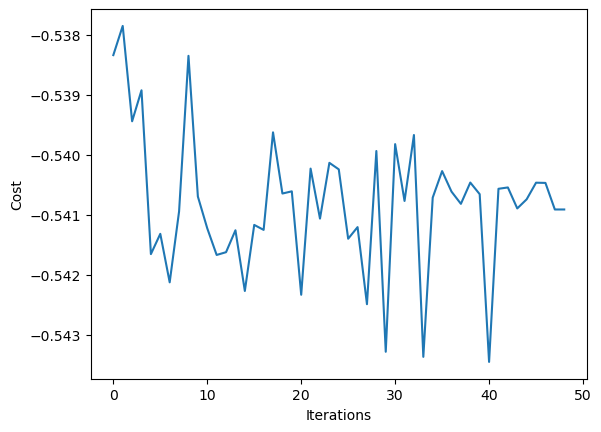

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[49])
T     = 300
kappa = 2 * np.pi * 0.050

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 10.5, 17, 23.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4.  10.5 17.  23.5]
[ 4.  10.5 17.  23.5]
0.5363601790476265

[ 5.  10.5 17.  23.5]
0.5375448947162035

[ 5.  10.5 17.  23.5]nt cost: -0.5375448947162035]
0.5375448947162035

[ 5.  11.5 17.  23.5]
0.5374497976568036

[ 5.  11.5 17.  23.5]nt cost: -0.5374497976568036]
0.5374497976568036

[ 5.  10.5 18.  23.5]
0.5388863313906349

[ 5.  10.5 18.  23.5]nt cost: -0.5388863313906349]
0.5388863313906349

[ 5.  10.5 18.  24.5]
0.5386834723888213

[ 5.  10.5 18.  24.5]nt cost: -0.5386834723888213]
0.5386834723888213

[ 5.65683885 10.44727558 18.74372927 23.38752941]
0.5399146785695406

[ 5.65683885 10.44727558 18.74372927 23.38752941]]
0.5399146785695406

[ 5.66003128 10.37735253 19.73006206 23.23837106]
0.5419934664931434

[ 5.66003128 10.37735253 19.73006206 23.23837106]]
0.5419934664931434

[ 5.3158767  10.66648745 20.61931837 23.15362538]
0.5429349545846632

[ 5.3158767  10.66648745 20.61931837 23.15362538]]
0.5429349545846632

[ 5.10906334  9.80502395 21.08031227 23.10269902]
0.543424314

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.5438878325375356
       x: [ 5.108e+00  9.804e+00  2.108e+01  2.310e+01]
    nfev: 53
   maxcv: 0.0

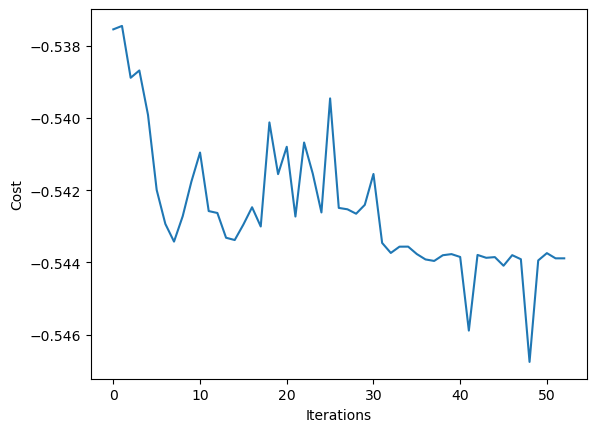

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 300
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array(x0)

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 3.75 11.25 18.75 26.25]
[ 3.75 11.25 18.75 26.25]
0.6080016907398377

[ 4.75 11.25 18.75 26.25]
0.6085031951339711

[ 4.75 11.25 18.75 26.25]ost: -0.6085031951339711]
0.6085031951339711

[ 4.75 12.25 18.75 26.25]
0.60829930232939

[ 4.75 12.25 18.75 26.25]ost: -0.60829930232939]
0.60829930232939

[ 4.75 11.25 19.75 26.25]
0.6090255875863112

[ 4.75 11.25 19.75 26.25]ost: -0.6090255875863112]
0.6090255875863112

[ 4.75 11.25 19.75 27.25]
0.6099314645250994

[ 4.75 11.25 19.75 27.25]ost: -0.6099314645250994]
0.6099314645250994

[ 5.17589384 11.0768476  20.19363266 28.01930016]
0.6129503571476224

[ 5.17589384 11.0768476  20.19363266 28.01930016]]
0.6129503571476224

[ 6.15237255 11.03558415 20.29935348 28.20262986]
0.6135576849425763

[ 6.15237255 11.03558415 20.29935348 28.20262986]]
0.6135576849425763

[ 6.1420672  10.03918157 20.34137491 28.27549892]
0.6124243363354854

[ 6.1420672  10.03918157 20.34137491 28.27549892]]
0.6124243363354854

[ 6.15237255 11.03558415 20.73249363 27.952

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6134499219398009
       x: [ 6.150e+00  1.103e+01  2.030e+01  2.820e+01]
    nfev: 44
   maxcv: 0.0

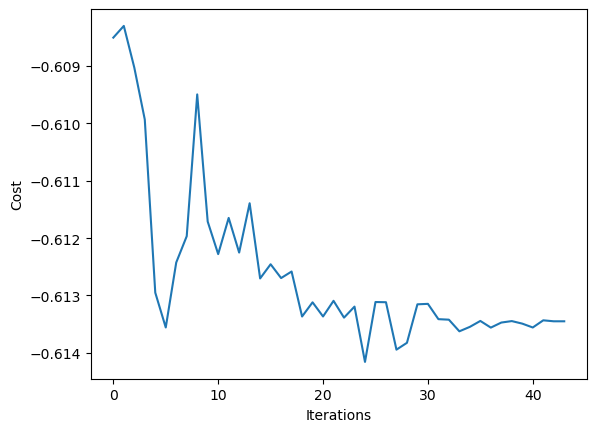

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


N_seq = 4
A     = 2 * np.pi * 0.001 * np.sqrt(0.01/photon_list[24])
T     = 300
kappa = 2 * np.pi * 0.025

x0 = []
for i in range(N_seq):
  x0.append(0.1*Pulse_Timing(0, T, N_seq)[i])

x0 = np.array([4, 10.5, 17, 23.5])

print(x0)

callback = build_callback(N_seq, A, T, kappa, callback_dict)
res = minimize(
  cost_func,
  x0,
  args=(N_seq, A, T, kappa),
  method="cobyla",
  callback=callback,
)

[ 4.  10.5 17.  23.5]
[ 4.  10.5 17.  23.5]
0.6086381750482379

[ 5.  10.5 17.  23.5]
0.6095707580349495

[ 5.  10.5 17.  23.5]nt cost: -0.6095707580349495]
0.6095707580349495

[ 5.  11.5 17.  23.5]
0.6078191746223152

[ 5.  11.5 17.  23.5]nt cost: -0.6078191746223152]
0.6078191746223152

[ 5.  10.5 18.  23.5]
0.6081351703296493

[ 5.  10.5 18.  23.5]nt cost: -0.6081351703296493]
0.6081351703296493

[ 5.  10.5 17.  24.5]
0.609620022204996

[ 5.  10.5 17.  24.5]nt cost: -0.609620022204996]
0.609620022204996

[ 5.38069069  9.78498428 16.41397722 24.52011018]
0.6080052896357465

[ 5.38069069  9.78498428 16.41397722 24.52011018]]
0.6080052896357465

[ 4.51298747 10.41245382 16.92824765 24.50246228]
0.607544429846842

[ 4.51298747 10.41245382 16.92824765 24.50246228]
0.607544429846842

[ 5.         10.65847298 16.80664459 24.5       ]
0.607745041076248

[ 5.         10.65847298 16.80664459 24.5       ]
0.607745041076248

[ 5.19814743 10.37152973 17.44070999 24.50277387]
0.6077391709206157



In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.6074491225218638
       x: [ 5.000e+00  1.050e+01  1.700e+01  2.450e+01]
    nfev: 41
   maxcv: 0.0

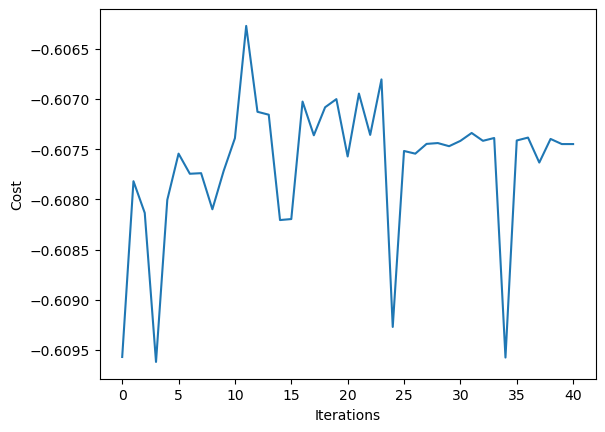

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Effective Linewidth & Photon Number & Ring-up Oscillation Frequency Simulation

A = 0.0005 GHz

In [33]:
rkappa_simulation = []
rphoton_simulation = []
roscillation_simulation = []

## $G=2\pi 10MHz$

### Setting

In [34]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.010        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [35]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [36]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [37]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 50MHz$

In [38]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.050  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [39]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032184, 0.01125657, 0.04923754])

In [40]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 60MHz$

In [41]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.060  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [42]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032227, 0.010878  , 0.04158306])

In [43]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 70MHz$

In [44]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.070  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [45]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032254, 0.01062424, 0.03581467])

In [46]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 80MHz$

In [47]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.080  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [48]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032272, 0.01045076, 0.03139675])

In [49]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 90MHz$

In [50]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.090  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [51]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032286, 0.01032854, 0.02793192])

In [52]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 100MHz$

In [53]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.100  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [54]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00032296, 0.01023976, 0.02515079])

In [55]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 20MHz$

### Setting

In [56]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.020        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [57]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [58]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [59]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 100MHz$

In [60]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.100  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [61]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00022637, 0.01153447, 0.10946869])

In [62]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 120MHz$

In [63]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.120  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [64]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00024692, 0.01099099, 0.09004664])

In [65]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 140MHz$

In [66]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.140  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [67]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00026232, 0.01067029, 0.07608086])

In [68]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 160MHz$

In [69]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.160  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [70]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00027393, 0.01046561, 0.0658197 ])

In [71]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 180MHz$

In [72]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.180  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [73]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00028277, 0.01032743, 0.058017  ])

In [74]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 200MHz$

In [75]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.200  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [76]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00028962, 0.01022995, 0.05189407])

In [77]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 30MHz$

### Setting

In [78]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.030        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [79]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [80]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [81]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 150MHz$

In [82]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.150  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [83]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.51164289e-04, 1.16907328e-02, 1.66863048e-01])

In [84]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 180MHz$

In [85]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.180  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [86]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00017726, 0.01101458, 0.13692146])

In [87]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 210MHz$

In [88]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.210  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [89]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00019953, 0.01066507, 0.11540518])

In [90]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 240MHz$

In [91]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.240  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [92]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00021813, 0.0104535 , 0.0996466 ])

In [93]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 270MHz$

In [94]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.270  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [95]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00023353, 0.01031352, 0.08770398])

In [96]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 300MHz$

In [97]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [98]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00024625, 0.01021554, 0.07836079])

In [99]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 40MHz$

### Setting

In [100]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.040        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [101]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [102]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [103]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 200MHz$

In [104]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.200  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [105]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.03180680e-04, 1.19115007e-02, 2.23191704e-01])

In [106]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 240MHz$

In [107]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.240  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [108]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.27074328e-04, 1.10368269e-02, 1.83266545e-01])

In [109]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 280MHz$

In [110]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.280  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [111]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.49450423e-04, 1.06444880e-02, 1.54505671e-01])

In [112]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 320MHz$

In [113]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.320  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [114]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00016974, 0.01042551, 0.13340935])

In [115]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 360MHz$

In [116]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.360  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [117]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00018776, 0.01028631, 0.11740921])

In [118]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 400MHz$

In [119]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [120]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00020357, 0.01019066, 0.10488787])

In [121]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## $G=2\pi 50MHz$

### Setting

In [122]:
# readout resonator & purcell filter resonator dimension

N = 3


# constant

B = 0.01 * 2 * np.pi        # gate operation time : 50ns

omega_r = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_f = 2 * np.pi * 7.0   # resonator frequency in units of GHz
omega_q = 2 * np.pi * 6.0   # qubit frequency in units of GHz
omega_rd = 2 * np.pi * 7.0  # qubit frequency in units of GHz
g = 2 * np.pi * 0.1         # qubit-resonator coupling in units of GHz
G = 2 * np.pi * 0.050        # qubit-resonator coupling in units of GHz


detune = omega_q-omega_r
chi = g*g/(detune)

omega_rd = omega_r          # qubit frequency in units of GHz
omega_qd = omega_q + chi

# operator defined on bare basis

sz = sigmaz()
sx = sigmax()
sy = sigmay()
sp = basis(2,1)*basis(2,0).dag()
sm = basis(2,0)*basis(2,1).dag()

a = destroy(N)
b = destroy(N)

sx_bare                 = tensor(sx, qeye(N), qeye(N))
sy_bare                 = tensor(sy, qeye(N), qeye(N))
sz_bare                 = tensor(sz, qeye(N), qeye(N))
sp_bare                 = tensor(sp, qeye(N), qeye(N))
sm_bare                 = tensor(sm, qeye(N), qeye(N))

readout_annihilate_bare = tensor(qeye(2), a, qeye(N))
readout_create_bare     = tensor(qeye(2), a.dag(), qeye(N))
readout_number_bare     = tensor(qeye(2), a.dag()*a, qeye(N))

filter_annihilate_bare  = tensor(qeye(2), qeye(N), b)
filter_create_bare      = tensor(qeye(2), qeye(N), b.dag())
filter_number_bare      = tensor(qeye(2), qeye(N), b.dag()*b)

psi0_bare               = tensor(basis(2,0), basis(N,0), basis(N,0))
psis_bare               = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0), basis(N,0))
psi1_bare               = tensor(basis(2,1), basis(N,0), basis(N,0))


H0 = -0.5*omega_q*sz_bare + omega_r*readout_number_bare + omega_f*filter_number_bare + g*(tensor(sp, a, qeye(N))+tensor(sm, a.dag(), qeye(N))) + G*(tensor(qeye(2), a, b.dag()) + tensor(qeye(2), a.dag(), b))
H1 = tensor(qeye(2), a+a.dag(), qeye(N))
H2 = sx_bare

In [123]:
kets = []

kets.append(H0.eigenstates()[1][0])
kets.append(H0.eigenstates()[1][1])
kets.append(H0.eigenstates()[1][2])
kets.append(-H0.eigenstates()[1][3])
kets.append(-H0.eigenstates()[1][4])
kets.append(H0.eigenstates()[1][5])

kets.append(H0.eigenstates()[1][6])
kets.append(-H0.eigenstates()[1][7])
kets.append(-H0.eigenstates()[1][8])
kets.append(H0.eigenstates()[1][9])
kets.append(H0.eigenstates()[1][10])
kets.append(H0.eigenstates()[1][11])

kets.append(H0.eigenstates()[1][12])
kets.append(-H0.eigenstates()[1][13])
kets.append(-H0.eigenstates()[1][14])
kets.append(H0.eigenstates()[1][15])
kets.append(-H0.eigenstates()[1][16])
kets.append(H0.eigenstates()[1][17])

In [124]:
sx_dressed = kets[0]*kets[1].dag() + kets[2]*kets[4].dag() \
+ kets[3]*kets[5].dag() + kets[6]*kets[9].dag() \
+ kets[7]*kets[10].dag() + kets[8]*kets[11].dag() \
+ kets[12]*kets[14].dag() + kets[13]*kets[15].dag() \
+ kets[16]*kets[17].dag() \
+ kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

sy_dressed = (-1j)*kets[0]*kets[1].dag() + (-1j)*kets[2]*kets[4].dag() \
+ (-1j)*kets[3]*kets[5].dag() + (-1j)*kets[6]*kets[9].dag() \
+ (-1j)*kets[7]*kets[10].dag() + (-1j)*kets[8]*kets[11].dag() \
+ (-1j)*kets[12]*kets[14].dag() + (-1j)*kets[13]*kets[15].dag() \
+ (-1j)*kets[16]*kets[17].dag() \
+ (+1j)*kets[1]*kets[0].dag() + (+1j)*kets[4]*kets[2].dag() \
+ (+1j)*kets[5]*kets[3].dag() + (+1j)*kets[9]*kets[6].dag() \
+ (+1j)*kets[10]*kets[7].dag() + (+1j)*kets[11]*kets[8].dag() \
+ (+1j)*kets[14]*kets[12].dag() + (+1j)*kets[15]*kets[13].dag() \
+ (+1j)*kets[17]*kets[16].dag()

sz_dressed = kets[0]*kets[0].dag() + kets[2]*kets[2].dag() \
+ kets[3]*kets[3].dag() + kets[6]*kets[6].dag() \
+ kets[7]*kets[7].dag() + kets[8]*kets[8].dag() \
+ kets[12]*kets[12].dag() + kets[13]*kets[13].dag() \
+ kets[16]*kets[16].dag() \
- kets[1]*kets[1].dag() - kets[4]*kets[4].dag() \
- kets[5]*kets[5].dag() - kets[9]*kets[9].dag() \
- kets[10]*kets[10].dag() - kets[11]*kets[11].dag() \
- kets[14]*kets[14].dag() - kets[15]*kets[15].dag() \
- kets[17]*kets[17].dag()

sp_dressed = kets[1]*kets[0].dag() + kets[4]*kets[2].dag() \
+ kets[5]*kets[3].dag() + kets[9]*kets[6].dag() \
+ kets[10]*kets[7].dag() + kets[11]*kets[8].dag() \
+ kets[14]*kets[12].dag() + kets[15]*kets[13].dag() \
+ kets[17]*kets[16].dag()

readout_number_dressed = kets[3]*kets[3].dag() + kets[5]*kets[5].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[12]*kets[12].dag() + kets[14]*kets[14].dag() \
+ 2*kets[8]*kets[8].dag() + 2*kets[11]*kets[11].dag() \
+ 2*kets[13]*kets[13].dag() + 2*kets[15]*kets[15].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()

filter_number_dressed = kets[2]*kets[2].dag() + kets[4]*kets[4].dag() \
+ kets[7]*kets[7].dag() + kets[10]*kets[10].dag() \
+ kets[13]*kets[13].dag() + kets[15]*kets[15].dag() \
+ 2*kets[6]*kets[6].dag() + 2*kets[9]*kets[9].dag() \
+ 2*kets[12]*kets[12].dag() + 2*kets[14]*kets[14].dag() \
+ 2*kets[16]*kets[16].dag() + 2*kets[17]*kets[17].dag()


In [125]:
psi0_dressed             = H0.eigenstates()[1][0]
psi1_dressed             = H0.eigenstates()[1][1]
psis_dressed             = (psi0_dressed + psi1_dressed)/np.sqrt(2)

op_list = [sx_dressed, sy_dressed, sz_dressed, sp_dressed, readout_number_dressed, filter_number_dressed]

### $ \kappa = 2\pi 250MHz$

In [126]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.250  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [127]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([7.33267588e-05, 1.21785516e-02, 2.79615618e-01])

In [128]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 300MHz$

In [129]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.300  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [130]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([9.32357383e-05, 1.10480768e-02, 2.29789103e-01])

In [131]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 350MHz$

In [132]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.350  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [133]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.13084147e-04, 1.05995046e-02, 1.93843464e-01])

In [134]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 400MHz$

In [135]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.400  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [136]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([1.32183288e-04, 1.03728143e-02, 1.67435173e-01])

In [137]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 450MHz$

In [138]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.450  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [139]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.0001501 , 0.01023745, 0.14738054])

In [140]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

### $ \kappa = 2\pi 500MHz$

In [141]:
# Simulation

N_seq = 0
A = 0.0005 * 2 * np.pi
omega_qd = 37.6381
kappa_f = 2 * np.pi * 0.500  # external coupling rate of resonator in units of GHz

tlist = np.linspace(0, 1000, 10000)

result = mesolve(
    [H0, [H1, Hrd_lab_frame], [H2, CP_lab_frame]],
    psis_dressed,
    tlist,
    c_ops = [np.sqrt(kappa_f) * tensor(qeye(2), qeye(N), b)],
    args = {'A': A, 'T_srt_r': 0, 'T_end_r': 50000, 'Omega_rd': omega_rd, 'B': B, 'T_srt_q': 0, 'T_end_q': 400, 'N_seq': N_seq, 'Omega_qd': omega_qd},
    e_ops = op_list,
)

In [142]:
# Fitting function : exponential function

def func(t, a, b, kappa):
  return a*(1 - 2*np.exp(-kappa*t/2)*np.cos(2*np.pi*b*t) + np.exp(-kappa*t))


popt, pcov = curve_fit(func, tlist, result.expect[4], p0 = [0.02, 0.01, 0.012])

popt

array([0.00016662, 0.01014762, 0.13167345])

In [143]:
rkappa_simulation.append(popt[2])
rphoton_simulation.append(popt[0])
roscillation_simulation.append(np.abs(popt[1]))

## Comparison btw simulation & theory

In [144]:
rkappa_simulation

[0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]

In [145]:
rphoton_simulation

[0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]

In [146]:
roscillation_simulation

[0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]

rkappa_simulation

[0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]

rphoton_simulation

[0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]

roscillation_simulation

[0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]

In [13]:
rkappa_simulation = [0.04923754279033691,
 0.041583062538215795,
 0.035814672270080186,
 0.03139675094200489,
 0.027931920781119543,
 0.025150788224950257,
 0.10946869476482149,
 0.0900466388347687,
 0.076080860599921,
 0.06581970365623946,
 0.058016998355638824,
 0.05189406996775679,
 0.1668630484402444,
 0.13692145879312892,
 0.11540517973905985,
 0.099646600250414,
 0.08770398072520952,
 0.07836078720717052,
 0.22319170415481224,
 0.1832665453649386,
 0.15450567143329377,
 0.133409353331026,
 0.1174092065321609,
 0.10488786846167904,
 0.2796156184458503,
 0.2297891027877527,
 0.19384346406886288,
 0.16743517287832077,
 0.14738053986157504,
 0.1316734544309056]


rphoton_simulation = [0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268]


roscillation_simulation = [0.01125657465815319,
 0.010877999728563284,
 0.010624240169633552,
 0.010450762688776784,
 0.010328535913545767,
 0.010239762733728569,
 0.01153446513238578,
 0.010990987076565178,
 0.010670287075410474,
 0.01046561020815467,
 0.010327428373482165,
 0.010229949744862063,
 0.011690732781793268,
 0.011014582017475181,
 0.01066507365849155,
 0.010453495661126223,
 0.01031352334503507,
 0.010215536896557678,
 0.011911500704559855,
 0.011036826881900939,
 0.010644487966029726,
 0.010425508049551866,
 0.010286305148762716,
 0.010190658070429398,
 0.012178551609085219,
 0.011048076794453562,
 0.010599504646035337,
 0.010372814267771728,
 0.010237448185877105,
 0.010147624912670832]


rkappa_simulation = np.array(rkappa_simulation)
rphoton_simulation = np.array(rphoton_simulation)
roscillation_simulation = np.array(roscillation_simulation)

rphoton_standard = np.array([0.00032183931742404346,
 0.00032226817537076805,
 0.00032253829411257276,
 0.00032272172388725276,
 0.00032285552842946385,
 0.0003229576431198517,
 0.00022637078791909893,
 0.0002469238628478752,
 0.0002623234252684186,
 0.00027392541514727984,
 0.00028277349803799485,
 0.00028962099579278464,
 0.00015116428893386863,
 0.0001772568424160779,
 0.00019952599477977685,
 0.00021813303231170303,
 0.0002335342472574474,
 0.00024625314608902005,
 0.00010318068017176586,
 0.0001270743282172896,
 0.0001494504225316903,
 0.00016974089035147252,
 0.00018776385683784284,
 0.00020357132379627792,
 7.332675883460334e-05,
 9.32357382917971e-05,
 0.00011308414694623153,
 0.00013218328768968993,
 0.0001501027269015111,
 0.00016661698033074268])

In [14]:
rkappa_simulation/(2*np.pi)

array([0.0078364 , 0.00661815, 0.00570008, 0.00499695, 0.0044455 ,
       0.00400287, 0.01742248, 0.01433137, 0.01210865, 0.01047553,
       0.00923369, 0.0082592 , 0.02655708, 0.02179173, 0.0183673 ,
       0.01585925, 0.01395852, 0.01247151, 0.03552206, 0.02916778,
       0.02459034, 0.02123276, 0.01868626, 0.01669342, 0.04450221,
       0.03657207, 0.03085115, 0.02664814, 0.02345634, 0.02095648])

Text(0, 0.5, 'Effective Readout Linewidth (MHz)')

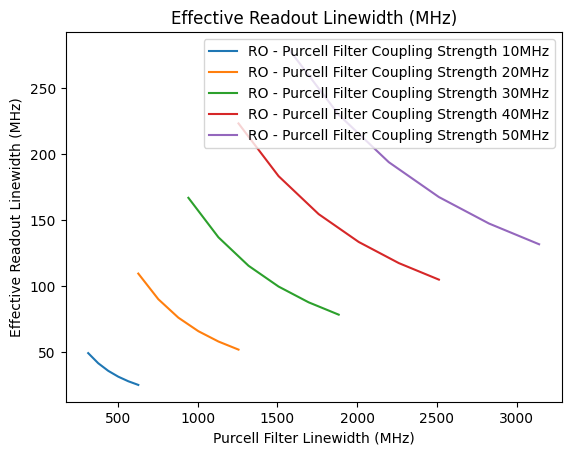

In [15]:
# Plot Results

kappa_list1 = np.array([2*np.pi*10*(i+5) for i in range(6)])
kappa_list2 = np.array([2*np.pi*20*(i+5) for i in range(6)])
kappa_list3 = np.array([2*np.pi*30*(i+5) for i in range(6)])
kappa_list4 = np.array([2*np.pi*40*(i+5) for i in range(6)])
kappa_list5 = np.array([2*np.pi*50*(i+5) for i in range(6)])


plt.plot(kappa_list1, 1000*rkappa_simulation[0:6], label="RO - Purcell Filter Coupling Strength 10MHz")
plt.plot(kappa_list2, 1000*rkappa_simulation[6:12], label="RO - Purcell Filter Coupling Strength 20MHz")
plt.plot(kappa_list3, 1000*rkappa_simulation[12:18], label="RO - Purcell Filter Coupling Strength 30MHz")
plt.plot(kappa_list4, 1000*rkappa_simulation[18:24], label="RO - Purcell Filter Coupling Strength 40MHz")
plt.plot(kappa_list5, 1000*rkappa_simulation[24:30], label="RO - Purcell Filter Coupling Strength 50MHz")

plt.legend()
plt.title('Effective Readout Linewidth (MHz)')
plt.xlabel('Purcell Filter Linewidth (MHz)')
plt.ylabel('Effective Readout Linewidth (MHz)')

Text(0, 0.5, 'Readout Resonator Photon Number')

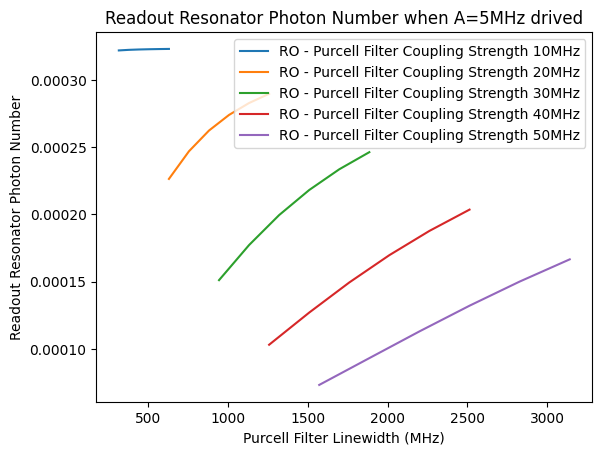

In [16]:
# Plot Results

kappa_list1 = np.array([2*np.pi*10*(i+5) for i in range(6)])
kappa_list2 = np.array([2*np.pi*20*(i+5) for i in range(6)])
kappa_list3 = np.array([2*np.pi*30*(i+5) for i in range(6)])
kappa_list4 = np.array([2*np.pi*40*(i+5) for i in range(6)])
kappa_list5 = np.array([2*np.pi*50*(i+5) for i in range(6)])


plt.plot(kappa_list1, rphoton_simulation[0:6], label="RO - Purcell Filter Coupling Strength 10MHz")
plt.plot(kappa_list2, rphoton_simulation[6:12], label="RO - Purcell Filter Coupling Strength 20MHz")
plt.plot(kappa_list3, rphoton_simulation[12:18], label="RO - Purcell Filter Coupling Strength 30MHz")
plt.plot(kappa_list4, rphoton_simulation[18:24], label="RO - Purcell Filter Coupling Strength 40MHz")
plt.plot(kappa_list5, rphoton_simulation[24:30], label="RO - Purcell Filter Coupling Strength 50MHz")

plt.legend()
plt.title('Readout Resonator Photon Number when A=5MHz drived')
plt.xlabel('Purcell Filter Linewidth (MHz)')
plt.ylabel('Readout Resonator Photon Number')